# TP : AI for Image Quality Assessment

Name: Imane SI SALAH

The objective of this TP is to give you some practical insights about what is the construction of a dataset and the problematic and modeling of annotations.
You will not train a model in this TP, but you will see some practical aspects that ML engineer have to face when they are asked to design model: get clean and good data.

Answer the questions below and then export the notebook with the answers using the menu option File->Download .ipynb. **[Then submit your solution here!](https://docs.google.com/forms/d/e/1FAIpQLSf1RKdUeP3fFogaQ2TqDfSO8fQnxG8dFI-wh7c-ywuLj7BYkA/viewform)**



# Part 1 - Designing annotation campaigns to build IQA datasets

> ### Question1: Cite five difficulties encountred when developping an IQA dataset

> #### A1:

<li> Subjectivity of the person assessing the image: we all have different satandards for what a good image is.
<li> Selecting a faithful reference image: Choosing appropriate reference images is crucial, and they should be representative of the intended quality standard.
<li> Ensuring diversity in the dataset.
<li> Ensuring consistency annotation.
<li> Accounting for the dynamic nature of image quality.



> ### Question2: Cite four methods of annotating image quality

> #### A2:
<li>Subjective Scoring (MOS)
<li>Objective Assessment
<li>Differential Pair Comparison
<li>Categorical Quality Labeling



> ### Question3: For the two most common methods, which one do you think is a better choice? Cite a situation for each method where it is preferable. Answer these questions by citing two pros and two cons of each method and argument your choice of situations.


> #### A3:
>**Pairwise comparison:**
><li>Pros:
><br>
>- Sensitive to small differences in images<br>
>- Requires little training so eliminates the bias of the observer
>
><li> Cons:
><br>
>- Number of comparisons increases quadratically with the number of images ot compare. <br>
>- Increased annotation complexity<br>
>
>**MOS:**
><li>Pros:
><br>
>- Provides interpretable scale for quality or distortion beyond a certain threshold
><br>
>- scalable for large datasets
><br>
><li> Cons:
><br>
>- It requires training of the annotators which can have different interpretations of the scale
><br>
>- Does not provide information about relative differences between images in terms of quality
><br>


> ### Q4: Let's now focus on Pairwise comparison methods (PWC) and Mean Opinion Score (MOS). Let's imagine that comparing the quality between two images can take on average 5 seconds (PWC), while evaluating the quality of a single image can take around 15 seconds (MOS). Calculate the necessary time to do a full pass of annotations for one person for both methods in Q3. What's the total number of data points (comparisons for PWC and evaluations for MOS) for both methods?


> #### A4:
><li> for pwc we consider the triangular matrix elements thats formed by all the images we have. $1+2+3+…+(n−1)$ and it can be calculated by: $\frac{(n−1)⋅n}{2}$
><li>and for the mos the forward pass consists on puting a score on all the images once, $n$
><li> the time necessary for mos $t = 15 sec* n $
><li> the time necessary


> ### Q5: Given an annotation campaign with N images. How does the time spent on the full annotation campaign change for each method? Plot the evolution of the total annotation cost per person (in minutes) in terms of N (1 to 50) for both methods. What is the minimum number of images on which comparisons (PWC) is more costly?


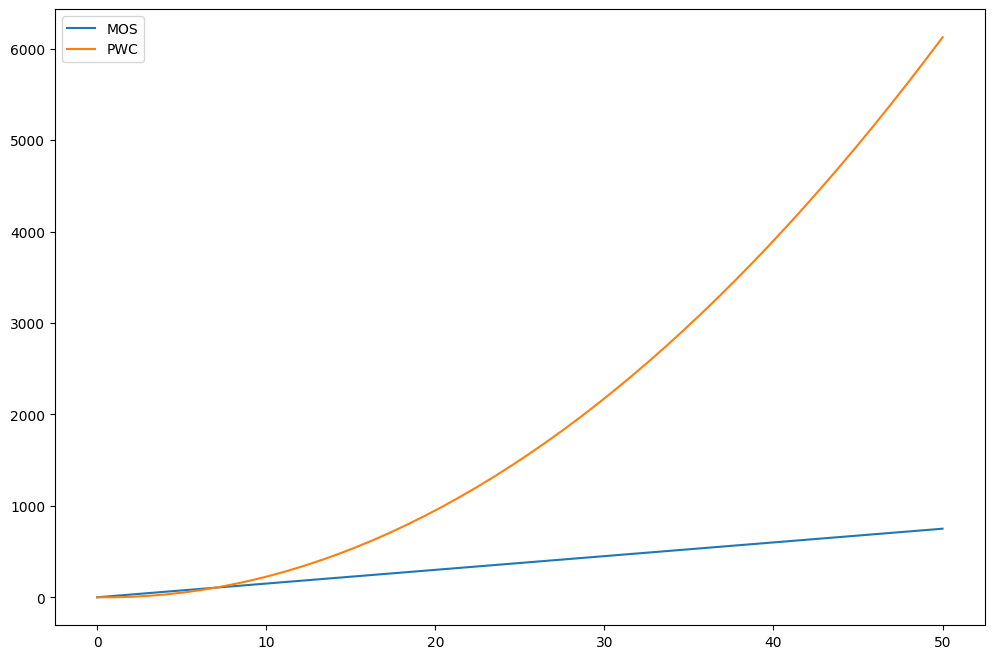

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12.0, 8.0))
N= 50
x= np.linspace(0,N)
Mos= x*15
PWC= 5*(x-1)*x/2

plt.plot(x, Mos, label='MOS')
plt.plot(x, PWC, label='PWC')
plt.legend()
plt.show()

> ### Q6: Redo the plot of Q5 taking into consideration that we need five times more single annotations to reach a similar precision with the comparisons

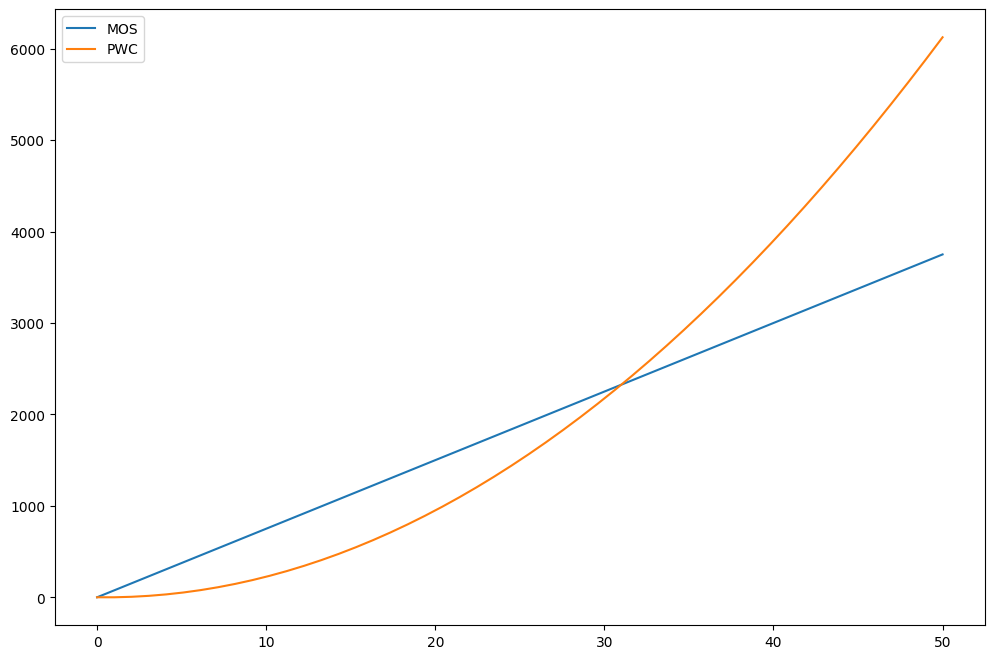

In [ ]:
plt.figure(figsize=(12.0, 8.0))
N= 50
x= np.linspace(0,N)
Mos= x*15*5
PWC= 5*(x-1)*x/2

plt.plot(x, Mos, label='MOS')
plt.plot(x, PWC, label='PWC')
plt.legend()
plt.show()

> A6

> ### Q7: For big data sets, it is not feasible to do a complete design for all annotators and all images. How can we reduce the number of comparisons without losing much precision?

> #### A7:


> When the data is large, it is not possible to achieve a complete design (a full passage on all data points for each observer), hence a sampling strategy is necessary. To make big annotation campaigns more efficient, we can resort to active sampling techniques. Active sampling [1,2,3,4,5] is the process of optimally choosing the image pairs for PWC annotation tasks. Some of these techniques are more sophisticated than others.
>   ###### [1] Chen, Bennett, Collins-Thompson, Horvitz (2013). Pairwise ranking aggregation in a crowdsourced setting. In Proceedings of the sixth ACM international conference on Web search and data mining, pp. 193–202
>   ###### [2] Ye, Doermann (2014). Active sampling for subjective image quality assessment. In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 4249–4256.
>   ###### [3] Li, Mantiuk, Wang, Ling, Callet (2018). Hybrid-MST: A hybrid active sampling strategy for pairwise preference aggregation. arXiv preprint arXiv:1810.08851, pp.
>   ###### [4] Xu, Xiong, Chen, Huang, Yao (2018). Hodgerank with information maximization for crowdsourced pairwise ranking aggregation. In Proceedings of the AAAI Conference on Artificial Intelligence, pp.
>   ###### [5] Mikhailiuk, Wilmot, Perez-Ortiz, Yue, Mantiuk (2020). Active Sampling for Pairwise Comparisons via Approximate Message Passing and Information Gain Maximization. arXiv preprint arXiv:2004.05691, pp.
> ### Q8: What do you think are straighforward techniques of sampling in a pairwise comparison experiment (other than the ones mentioned above)? list two

> #### A8:

Rnadom sampling,


# Part 2 - PWC simulation experiment

In this part, we will be testing the previous assumptions by simulating a pairwise comparison experiment

In [ ]:
import numpy as np
import time
import random
import math
from numpy.random import normal
import matplotlib.pyplot as plt
import torch
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [ ]:
!pip install networkx==2.8.5
import networkx as nx

nx.__version__

'2.8.5'

In [ ]:
# The following lines install the necessary packages in the colab environment
try:
    from google.colab import files
    !pip install -q hdf5storage

    !rm -fr TP-IQA
    !git clone --single-branch --quiet https://github.com/DXOMARK-OCTO/TP-IQA
    !cp -r TP-IQA/* .

except ImportError:
    # %matplotlib notebook
    pass

%matplotlib inline

import activepwcanalysis as adaComp
from activepwcanalysis import predictNext

> ### Q9: List the essential steps to simulate a pairwise comparison experiment.

> #### A9: Define ground truth image scores, set the number of standard trials, simulate observer responses based on ground truth and trial settings, create a comparison matrix, and assess image quality metrics like SROCC, PLCC, and STD


## A - Observer simulator model

> Scaling methods transform the comparison matrices in a pairwise comparison experiment into JOD scores (Image quality scores). These methods assume that the quality of an image, from an observer's point of view, follows a certain probability distribution. This is called an observer model and is still subject to research. We will follow the popular Thurstone case V (Thurstone, 1927) model [6]. This model supposes that the quality difference between two images follows a random Gaussian distribution, whose uncertainty reflects the inter and intra-annotator disagreement. This noise follows the rule that for two images $r_i, r_j$, if 75\% of the comparisons indicated that $r_i$ was of better quality than $r_j$ , $P(r_i > r_j) = 0.75$, then the difference is exactly 1 $JOD$ (a unit in our image quality scale). For this distance and probability, for a gaussian distribution with 0 mean, the standard deviation is $\sigma=1.4826$.
> ###### [6] A practical guide and software for analysing pairwise comparison experiments. arXiv preprint arXiv:1712.03686, pp

> ### Q10: Fill in the following function, called pwcObserverSimulator, that takes a pair of image scores (pairScores), the standard deviation (jodStd) and returns a simulated comparison based on the Thurstone case V observer model. The function should return the rank of the input images:
> ### - (0,1) if the second image is better or
> ### - (1,0) if the first element has better quality.
> ### The function should also return the score difference with the noise.

In [ ]:
def pwcObserverSimulator(pairScores, jodStd=1.4826, **kwargs):
    """
     1 - Our simulator takes a pair of images with known quality scores (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, jodStd)
     3 - Computes the difference and returns the rank and the score difference with the observer's bias
    """
    noise= np.random.normal(0,jodStd ,size=2)
    scores_n= pairScores + noise
    scorediff = scores_n[0]-scores_n[1]
    rank= (0,1) if scorediff<0 else (1,0)
    return rank,scorediff

> ### A10:

> ### Q11: Fill in the following function, called mosObserverSimulator, that takes an image score, adds noise, and returns the estimated MOS score.

In [ ]:
def mosObserverSimulator(imageScore, mosStd=1.048, **kwargs):
    """
     1 - Our simulator takes an image with a known quality score (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, mosStd)
     3 - Computes and returns the new noisy score
    """
    noise= np.random.normal(0,mosStd ,size=1)
    imageScore_n= imageScore+ noise

    return imageScore_n

> A11:

## B - Sampling algorithms


> To see the effectiveness of the active sampling, we will be comparing a popular algorithm, ASAP [5] to three other simple sampling approaches: random sampling, ranking based sampling, and an optimized ranking based sampling. Sometimes, sampling algorithms can be computionally heavy. To accelerate the sampling process, instead of generating one pair at a time, we generate a batch of pairs, where each image is present at least one time. In total, we have batches of size n-1.

> ### Q12: Fill in the first two of the following functions that implement the three sampling approaches mentioned above.

In [ ]:
def randomSampling(**kwargs):
    """
    1 - Takes the number of images and generate a batch of n-1 pairs where all images are at least once (we should avoid comparing the pair with itself)
    2 - Return the list of pairs
    """
    nbImages = kwargs.get('nbImages', None)
    # genrate random unique image indices
    idxes= random.sample(range(nbImages-1), nbImages-1)
    pairs= [(i, i+1) for i in idxes]
    return pairs

def rankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by taking the consecutive pairs of images.
    3 - Return the list of pairs
    """
    compMat = kwargs.get('imageScores', None)
    nbImages = kwargs.get('nbImages', None)
    ranks = np.argsort(compMat)
    idxes= random.sample(range(nbImages-1), nbImages-1)
    pairs= [(ranks[i], ranks[i+1]) for i in idxes]
    return pairs

def optRankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by randomly sampling from the local neighbors around each image (25% of the total images).
    3 - Return the list of pairs
    """
    imageScores = kwargs.get('imageScores', None)
    nbImages= kwargs.get('nbImages', None)
    neighborSize = math.ceil(0.05 * len(imageScores))

    if neighborSize <=1:
        return rankingBasedSampling(nbImages= nbImages, imageScores=imageScores)

    sortedIndices = np.argsort(imageScores)

    indicesSelected = []
    pairList = []

    while(len(indicesSelected) < len(imageScores)):
        selectedNode = random.sample([idx for idx in sortedIndices if idx not in indicesSelected], 1)[0]

        minBound = max(0, selectedNode - neighborSize//2)
        maxBound = min(len(imageScores), minBound + neighborSize +1)

        neighbourPool = [idx for idx in sortedIndices[minBound: maxBound] if idx!=selectedNode]
        pairSelected = (selectedNode, random.sample(neighbourPool,1)[0])
        pairList += [pairSelected]
        indicesSelected += [selectedNode]

    pairList.remove(next(p for p in pairList if next(q for q in indicesSelected if len([k for k in pairList if q in k]) > 2) in p ))
    return pairList

def asapSampling(**kwargs):
    """
    As Soon As Possible (ASAP) sampling.
    1 - Takes the number of images and generates a batch of n-1 pairs in sequential order.
    2 - Return the list of pairs.
    """
    nbImages = kwargs.get('nbImages', None)
    pairs = [(i, i + 1) for i in range(nbImages - 1)]
    return pairs

## C - Monte Carlo Simulation

> To simulate a PWC experiment, we need the following elements:
>   - The number of images
>   - The number of standard trials (1 st = number of full pass over the images)
>   - The observer simulation parameters
>   - The scaling algorithm
>   - The sampling algorithm
>   - The ground truth scores of the images
>   - The performance evaluation metrics

> ### Q13: Fill in the following function, called monteCarloPwcSim, that takes the list of image scores, the number of standard trials, the observer simulator and the sampling algorithm function, simulates a pairwise comparison experiment and returns the average image scores after each batch of pairs. Each batch of pairs is equal to n-1 pairs.

In [ ]:
def monteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)

    # Total number of batches
    nbBatches = int(nbTrials)
    avgJodScoreEvolution = []
    avgStdScoreEvolution = []

    # Perform Monte Carlo simulation
    for simulation in range(nbSimulations):
        # Comparison matrix
        compMat = np.zeros((nbImages, nbImages))

        # Initialize lists to store scores for each trial
        jodScoresList = []
        jodStdsList = []

        for batch in range(nbBatches):
            # Generate batch of image pairs
            compBatch = samplingAlgorithm(nbImages=nbImages, imageScores=groundTruthScores)

            normalizedGroundTruthScores = adaComp.normalizeScale(groundTruthScores, shiftToRefImage=True)
            # Simulate comparisons
            for pair in compBatch:
                # Simulate observer, always first element is best
                pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
                orderedPairIdx, _ = observerSimulator(pairScores)

                orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]
                # Update comparison matrix: COMPLETE HERE
                compMat = adaComp.updateCompMat(orderedPair, compMat)

            # Score generation
            jodScores, jodStds = adaComp.JODScores(compMat)

            # Append the scores for this trial to the lists
            jodScoresList.append(jodScores)
            jodStdsList.append(jodStds)

        # Calculate the average scores per simulation
        avgJodScoreEvolution.append(np.mean(jodScoresList, axis=0))
        # print(avgJodScoreEvolution[0])
        avgStdScoreEvolution.append(np.mean(jodStdsList, axis=0))

    return avgJodScoreEvolution, avgStdScoreEvolution


> A13:

> ### Q14: What are the two types of correlations that can be used to evaluate the performance of our simulation? What's the difference between them?

> #### A14:
>  we note *Spearman Rank Order Correlation Coefficient* (SROCC) and *Pearson’s
Linear Correlation Coefficient (PLCC)*
<br> While pearson correlation measures linear relationships, that is sensitive to scale and outliers,Spearman rank correlation assesses monotonic relationships, is less sensitive to outliers, and is scale-invariant, making it suitable for nonlinear associations.


> Q15 - Finally, lets define a function that generates, the ground truth score of a set of images. Define a function with input jodRange and nbImages, and outputs a set of 'nbImages' elements o values from 0 to jodRange.

In [ ]:
def groundTruthScores(jodRange, nbImages):
  scores= np.random.randint(0, jodRange-1, nbImages)
  return scores


> A15

> ### Q16: Let's fix the number of images in the data set to 20 and their JOD range to 10. Using the previous code, plot the evolution of the SROCC, PLCC and STD as we augment the number of standard trials up to 3, for all the 4 algorithms. What conclusion can you extract?

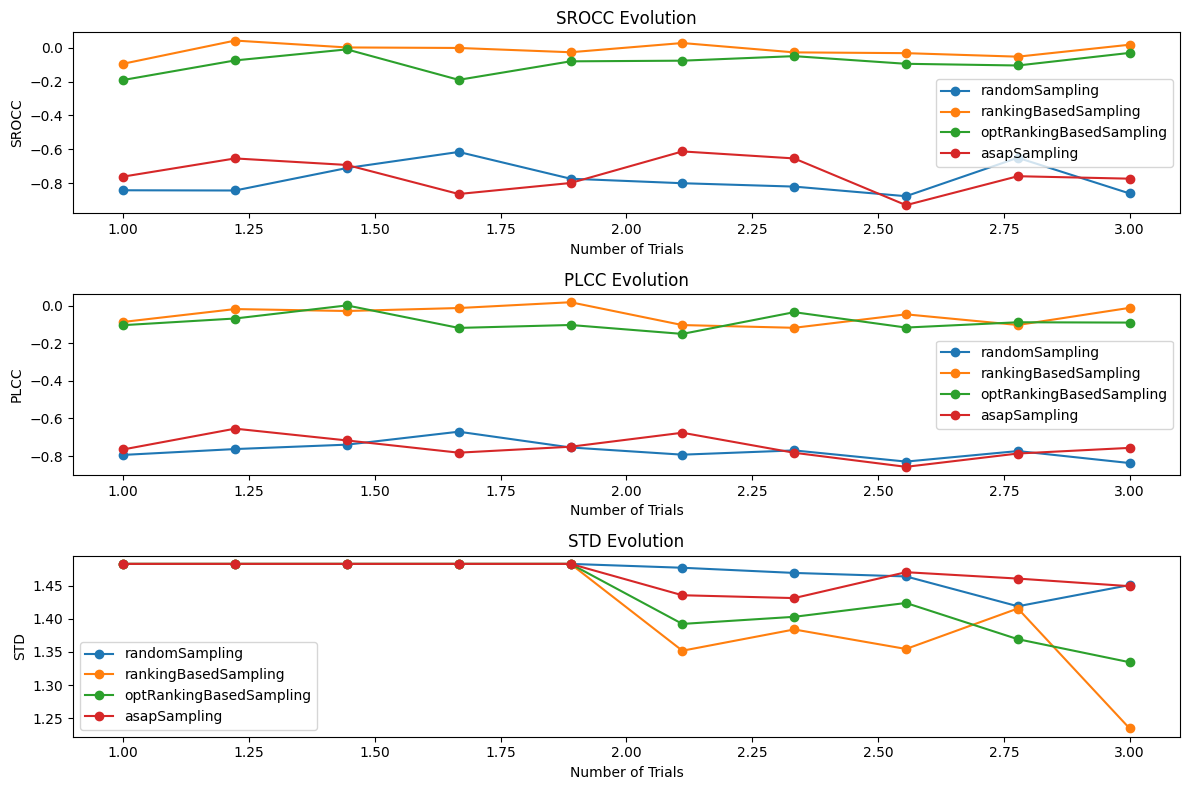

In [ ]:
from scipy.stats import spearmanr, pearsonr
nbImages = 20
jodRange = 10
nbTrials_range= np.linspace(1,3,10)
samplingAlgorithms= [randomSampling, rankingBasedSampling, optRankingBasedSampling, asapSampling]
gtScores= groundTruthScores(jodRange, nbImages)
results_srocc = np.zeros ((4, len(nbTrials_range)))
results_plcc =np.zeros ((4, len(nbTrials_range)))
results_std= np.zeros ((4, len(nbTrials_range)))
for i, nbTrials in enumerate(nbTrials_range):

  for j,samplingAlg in enumerate(samplingAlgorithms):
    avgJodScoreEvolution, avgStdScoreEvolution = monteCarloPwcSim(
            groundTruthScores= gtScores,
            nbTrials= nbTrials,
            observerSimulator= pwcObserverSimulator,
            samplingAlgorithm= samplingAlg,
            nbSimulations=1
        )
    results_srocc[j,i], _= spearmanr(gtScores, avgJodScoreEvolution[0])
    results_plcc[j,i],_ = pearsonr(gtScores, avgJodScoreEvolution[0])
    results_std[j,i] = np.std(avgJodScoreEvolution[0])



# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
for j, samplingAlg in enumerate(samplingAlgorithms):
    plt.plot(nbTrials_range, results_srocc[j, :], marker='o', label=f'{samplingAlg.__name__}')
plt.title('SROCC Evolution')
plt.xlabel('Number of Trials')
plt.ylabel('SROCC')
plt.legend()

plt.subplot(3, 1, 2)
for j, samplingAlg in enumerate(samplingAlgorithms):
    plt.plot(nbTrials_range, results_plcc[j, :], marker='o', label=f'{samplingAlg.__name__}')
plt.title('PLCC Evolution')
plt.xlabel('Number of Trials')
plt.ylabel('PLCC')
plt.legend()

plt.subplot(3, 1, 3)
for j, samplingAlg in enumerate(samplingAlgorithms):
    plt.plot(nbTrials_range, results_std[j, :], marker='o', label=f'{samplingAlg.__name__}')
plt.title('STD Evolution')
plt.xlabel('Number of Trials')
plt.ylabel('STD')
plt.legend()

plt.tight_layout()
plt.show()

> A16: From the plots we see that for SROCC and PLCC random sampling and ASAP sampling perform better, they give strong negative correlations, However optRanking based sampling gives better STD values for larger number of trials whereas for small number of trial all sampling methods perform the same regarding STD.

> ### Q17: Let's now fix the number of standard trials (a.k.a the number of comparisons) to 1.5, and vary the JOD range of the scene. Plot again the SROCC, PLC and STD according to a varing JOD (2-20), for your 4 sampling algorithms. How do you interpret the results? Regarding the std, which sapling algorithm is better? why do you think this is the case?

/content/activepwcanalysis.py:85: RuntimeWarning: invalid value encountered in divide
  normalizedScore = (score - np.mean(score))/np.std(score) * SIGMA_JOD
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


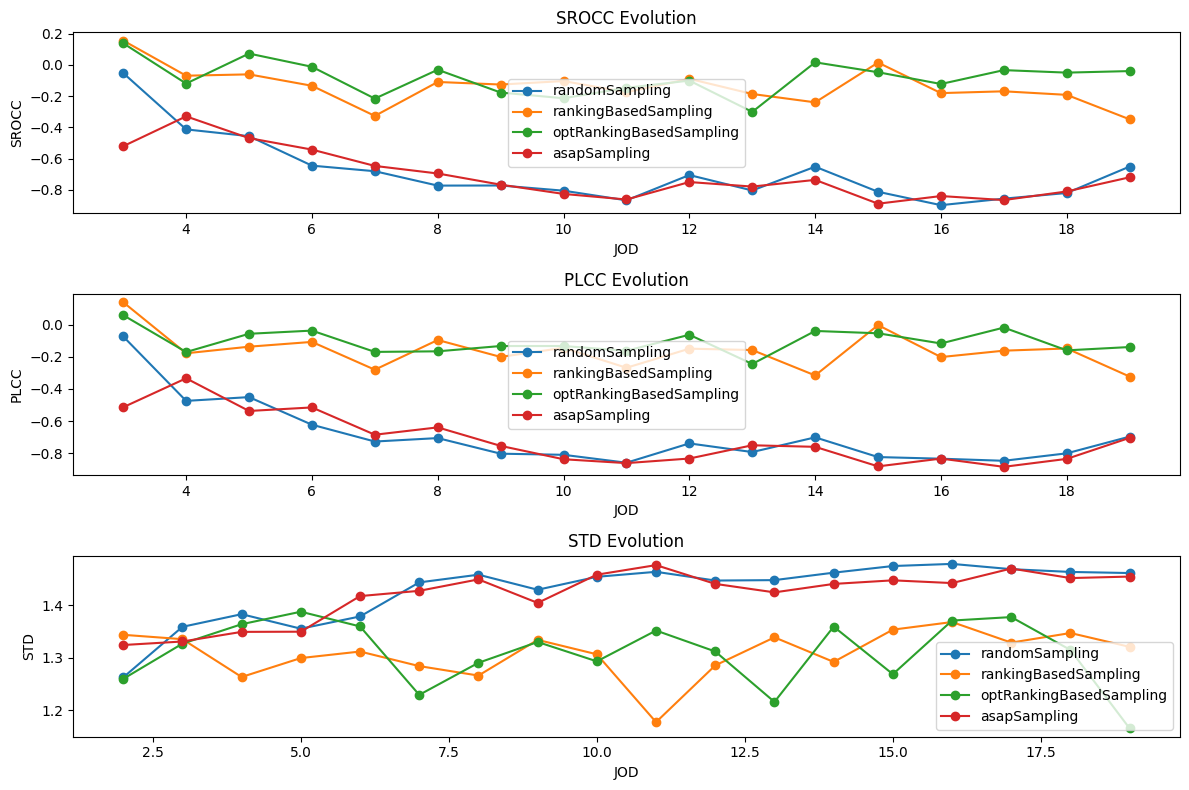

In [ ]:
nbImages = 20
jodRange = range(2, 20)

nbTrials_range= 1.5
samplingAlgorithms= [randomSampling, rankingBasedSampling, optRankingBasedSampling, asapSampling]

results_srocc = np.zeros ((4, len(jodRange)))
results_plcc =np.zeros ((4, len(jodRange)))
results_std= np.zeros ((4, len(jodRange)))


for i, jod in enumerate(jodRange):
  gtScores= groundTruthScores(jod, nbImages)
  for j,samplingAlg in enumerate(samplingAlgorithms):
    avgJodScoreEvolution, avgStdScoreEvolution = monteCarloPwcSim(
            groundTruthScores= gtScores,
            nbTrials= nbTrials,
            observerSimulator= pwcObserverSimulator,
            samplingAlgorithm= samplingAlg,
            nbSimulations=1
        )
    results_srocc[j,i], _= spearmanr(gtScores, avgJodScoreEvolution[0])
    results_plcc[j,i],_ = pearsonr(gtScores, avgJodScoreEvolution[0])
    results_std[j,i] = np.std(avgJodScoreEvolution[0])



# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
for j, samplingAlg in enumerate(samplingAlgorithms):
    plt.plot(jodRange, results_srocc[j, :], marker='o', label=f'{samplingAlg.__name__}')
plt.title('SROCC Evolution')
plt.xlabel('JOD')
plt.ylabel('SROCC')
plt.legend()

plt.subplot(3, 1, 2)
for j, samplingAlg in enumerate(samplingAlgorithms):
    plt.plot(jodRange, results_plcc[j, :], marker='o', label=f'{samplingAlg.__name__}')
plt.title('PLCC Evolution')
plt.xlabel('JOD')
plt.ylabel('PLCC')
plt.legend()

plt.subplot(3, 1, 3)
for j, samplingAlg in enumerate(samplingAlgorithms):
    plt.plot(jodRange, results_std[j, :], marker='o', label=f'{samplingAlg.__name__}')
plt.title('STD Evolution')
plt.xlabel('JOD')
plt.ylabel('STD')
plt.legend()

plt.tight_layout()
plt.show()

> A17: We see that random sampling and ASAP sampling perform better for all JOD distances, as for the STD then ranking based sampling methods perform better although they fluctuate.

> ### Q18: What are the conclusions you can make from this experiment? What approach performs better and in what situtations?

> #### A18:
>   * Some methods are more consistent than others.
>   * ASAP performs consistently on any quality range.
>   * Other sampling techniques depend on the quality range and the number of images.
>   * The wider the quality gaps, the more we need sophisticated sampling approaches

## D - Bootstrapping

> Since we do not have the ground truth scores in real life, we rely on a different approach to estimate the precision of the PWC experiments.

> ### Q19: In your opinion, what are possible steps to evaluate the results of a PWC experiment?

> #### A19: in the context of bootstraping, the steps to evaluate PWC are, to genrate multiple sample using bootstraping then calculate perfomance matrics, then calculate confidence intervals from the obtained metric distribution, finnally assess robustness and reliability.



> ### Q20:
One essential step to evaluate the PWC experiment is by estimating the confidence in our JOD scores. To do so, we compute the confidence intervals using percentile bootstrapping. Bootstrapping can be used to estimate the empirical distribution of our samples, and therefore its variability. In a PWC experiment, both the pairs and the individual comparison matrices (per person) can be considered candidate samples. Bootstrapping over the comparison samples usually results in smaller confidence intervals than over observer matrices.
> ### Explain how the following functions work

In [ ]:
def bootstrapMatrix(compMat, softSampling=False):
    """
    Soft sampling: instead of repeating the whole comparison pair, we sample per image, thus pair row
    """
    rows,cols = compMat.shape

    if softSampling:
        pairList = []
        for r in range(rows):
            rowPairList = np.where(compMat[r,:]!=0)[0]
            nbComparisons = int(np.sum(compMat[r,:]))
            rowPairList = [(r, pair1) for pair1 in rowPairList for i in range(int(compMat[r, pair1]))]

            pairList += [rowPairList[i] for i in np.random.choice(len(rowPairList), nbComparisons, replace=True)]
    else:
        pairList = np.where(compMat!=0)

        nbComparisons = int(np.sum(compMat))
        # We suppose that EACH comparison is one sample, hence for a pair with many comparisons, this is considered as many samples, from which comes the repetition of the same tuple.
        pairList = [(pair0, pair1) for pair0, pair1 in zip(pairList[0], pairList[1]) for i in range(int(compMat[pair0, pair1]))]
        pairList = [pairList[i] for i in np.random.choice(len(pairList), nbComparisons, replace=True)]

    compMat = np.zeros((rows, cols),)
    for pair in pairList:
        compMat[pair] += 1
    return compMat

def bootstrapObserverList(listObserverMatrices, ):
    nbObservers = len(listObserverMatrices)

    loadedObserverMatrices = []

    for file in listObserverMatrices:
        compMatData = np.load(file)
        compMat = compMatData['COMP_MAT']
        compMatData.close()
        loadedObserverMatrices.append(compMat)

    boostrappedMatrices = [loadedObserverMatrices[i] for i in np.random.choice(nbObservers, nbObservers, replace=True)]

    return np.sum(boostrappedMatrices, axis=0)

def confidenceInterval(variablesScoreList, confidenceLevel=0.95,):
    rows,cols = variablesScoreList.shape
    confidenceIntervals = np.zeros((rows,2))

    for i in range(rows):
        sortedScores = np.sort(variablesScoreList[i,:])
        confidenceIntervals[i,:] =  (sortedScores[int(np.floor((cols-1)*(1-confidenceLevel)/2))], sortedScores[int(np.ceil((cols-1)*(1+confidenceLevel)/2))])
    return confidenceIntervals

>A19:
>The **bootstrapMatrix()** function generates new comparison matrix with variations to account for uncertainties in observed comparisons. The **bootstrapObserverList()** function bootstraps observer matrices to capture diverse observer responses. Finally, the **confidenceInterval()** function computes confidence intervals for variables, which are needed in the evaluation of result reliability and uncertainty.

# Part 3 (Optional)- Perceptual Scale generation from real annotation matrices

In this section, we will work on the real output of an annotation campaign. A group of 21 people annotated a set of images following a Pairwise methodology. The pairs were proposed by an active sampling algorithm.  We will extract the IQ score (JOD), the confidence interval for each image and, finally, identify the random annotator.

In the data folder, each file .npz corresponds to an unique annotator. The rows and columns of the matrix correspond to image files, the order can be found on the "LIST_FILES" field of the npz.  

In file create_global_comparison_matrix.py, you can find a function that allows you to compute the global comparison matrix, that is, the matrix that summarizes all information from all annotators.

> ### Q21 : Compute the global matrix and visualize it (check create_global_comparison_matrix.py). Do all images have the same number of comparisons? How many standard trials do we have?

>A21:

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
import create_global_comparison_matrix


> ### Q22: What image was compared the must number of times?

>A22:

> ### Q23: Extract the JOD scores for every image and plot them ordered by value

>A23

> ### Q24: Using the functions introduced in the end of the previous section, generate the 95% confidence interval over 200 iterations of bootstrapping, by bootstrapping over comparisons and over observers.

> ### Q25: What are your conclusions?